## <font color = "teal">Imbalanced Data -  What is it and How to handle it</font>

The problem of data imbalance  is common when there are some classes in the data that have low occurence. These are the minority classes, they affect the accuracy level of the classifiers. This is because the  classifiers learn to recognie the dominant class bettter at the expense of the minority class. This is especailly important when detecting the minority class is the goal of the classifier.
A good example is when creating a classifier for fraud detection or cancer case detection. You find that there are very few cases compared to the normal cases and if you use this data for classification, you lose some accuracy levels. To overcome this challenge, you can use a variety of methods but they are all based on Over_sampling: You add dummy data for the minority class to have equal representation, or undersampling which is to reduce the majority class to the level of the minority class( This rduces the accuracy leve)but improves detection of the minority class. There are also methods that combine the two methods, Here we look at all of these methods and compare their results. 
We use the Imblearn library for oversampling, undersampling and combining the two.

<a href = "https://drive.google.com/file/d/1q53yOIBFAnIN2YFLnLiObYmjz6EatbFu/view?usp=sharing"><button  style = "color:red;">You Can Download The Dataset Here</button></a>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import os
link = "C:\\Users\\Gilgamesh\\Documents"
os.chdir(link) # changes the working directory to where the data is saved
Data = pd.read_csv('creditcard.csv') #  reads the dataset csv

In [30]:
# Explore the dataset
print( "the data has %s rows and  %s columns"  % (Data.shape[0],Data.shape[1]) )
Data.head()

the data has 284807 rows and  31 columns


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [31]:
# From the above information we can check out the distribution of the last column "class"


j =Data.Class.value_counts()[0] + Data.Class.value_counts()[1] 
x = (Data.Class.value_counts()[0] / j) *100
y = (Data.Class.value_counts()[1] / j) *100
print("the column Class has %s percent  of Non fraud and %s percent of the fraud class, this is a case of imbalance"% (x,y))
Data.Class.value_counts() # distribution of the two classes
# this is a case of data imbalance since the data has more of the positive class than those of the negative class
# If you train a classifier with such data, its accuracy level in detecting the positive class will be very high ( 90th percentile) but that of the negative class will be very low.

the column Class has 99.82725143693798 percent  of Non fraud and 0.1727485630620034 percent of the fraud class, this is a case of imbalance


0    284315
1       492
Name: Class, dtype: int64

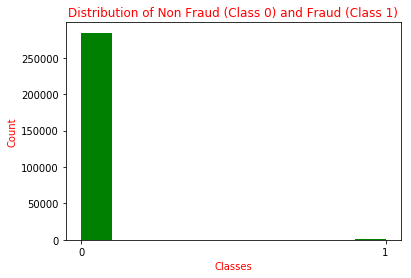

In [32]:
# The graphical distribution
plt.hist(Data.Class,color = "green")
plt.xticks(range(2))
plt.title("Distribution of Non Fraud (Class 0) and Fraud (Class 1)", color = "red")
plt.xlabel("Classes", color = "red")
plt.ylabel("Count",color = "red")
plt.show()

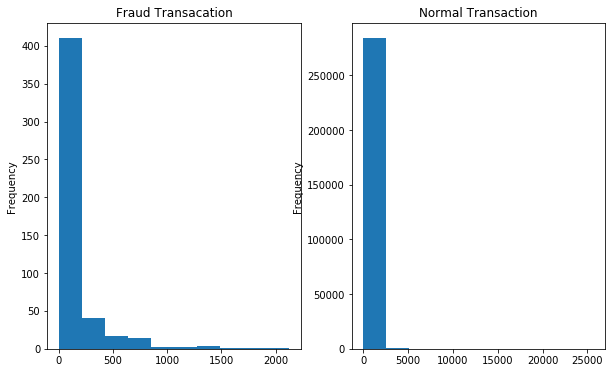

In [33]:
# The Distribution of the Amount transacted between the two classes
Fraud_transacation = Data[Data["Class"]==1]
Normal_transacation= Data[Data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation.Amount.plot.hist(title="Fraud Transacation")
plt.subplot(122)
Normal_transacation.Amount.plot.hist(title="Normal Transaction")

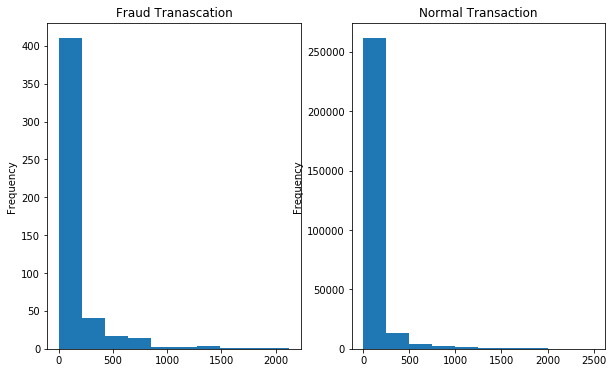

In [34]:
# the distribution for Normal transction is not clear and it seams that all transaction are less than 2.5 K
# So plot graph for same 
Fraud_transacation = Data[Data["Class"]==1]
Normal_transacation= Data[Data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation[Fraud_transacation["Amount"]<= 2500].Amount.plot.hist(title="Fraud Tranascation")
plt.subplot(122)
Normal_transacation[Normal_transacation["Amount"]<=2500].Amount.plot.hist(title="Normal Transaction")

ReSampling - Under Sampling
Before re sampling lets have look at the different accuracy matrices

Accuracy = TP+TN/Total

Precison = TP/(TP+FP)

Recall = TP/(TP+FN)

TP = True possitive means no of possitve cases which are predicted possitive

TN = True negative means no of negative cases which are predicted negative

FP = False possitve means no of negative cases which are predicted possitive

FN= False Negative means no of possitive cases which are predicted negative

Now for our case recall will be a better option because in these case no of normal transacations will be very high than the no of fraud cases and sometime a fraud case will be predicted as normal. So, recall will give us a sense of only fraud cases

Resampling

in this we will resample our data with different size

then we will try to use this resampled data to train our model

then we will use this model to predict for our original data

In [35]:
# Train a DecisionTreeClassifier and Check the Metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
X = Data.iloc[:,0:30]
Y = Data.Class
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)
Class = DecisionTreeClassifier(random_state = 42)
Class.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [36]:
H = Class.predict(x_test)
print(H[: 10],
y_test[: 10])
(confusion_matrix(y_test,H))


[0 0 0 0 0 0 0 0 0 0] 94130     0
254884    0
38204     0
40851     0
184233    0
22294     0
82054     0
129363    0
219638    0
239256    0
Name: Class, dtype: int64


array([[85266,    45],
       [   33,    99]], dtype=int64)

In [37]:
#print the classification report
print("___",accuracy_score(y_test,H)) # The overall model accuracy is very high  - 99 percent and yet this would be a wrong metric to use in assesing the model strength
G = classification_report(y_test,H)
print(G) # The Accuracy for the 0 Class is very high, while that of the 1 class is relatively low, this is the problem of Unbalanced Data

___ 0.9990871107053826
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85311
          1       0.69      0.75      0.72       132

avg / total       1.00      1.00      1.00     85443



## Undersampling and Oversampling using imblearn 

In [38]:
#!pip install imblearn
# Import the required libraries for the same
from imblearn.over_sampling import SMOTE
#from sklearn_pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from imblearn.combine import SMOTEENN

In [39]:

Classfier = DecisionTreeClassifier(random_state = 42)
# SMOTE model  - oversampling
SMmote = make_pipeline_imb(SMOTE(random_state = 42),Classfier)
Smote = SMmote.fit(x_train,y_train)
Smote_prediction = Smote.predict(x_test)
# Under_sampling model
Near_miss = make_pipeline_imb(NearMiss(random_state = 42),Classfier)
Near = Near_miss.fit(x_train,y_train)
Near_pred = Near.predict(x_test)

SmoteNN = make_pipeline_imb(SMOTEENN(random_state = 42),Classfier)
Snn = SmoteNN.fit(x_train,y_train)
SNN = SmoteNN.predict(x_test)

#Combine Undersampling and Oversampling using SMOTE and ENN (edited nearest neighbours)()

In [40]:
print(classification_report(y_test,H))
print(classification_report(y_test,Smote_prediction))
print(classification_report(y_test,Near_pred))
print(classification_report(y_test,SNN))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85311
          1       0.69      0.75      0.72       132

avg / total       1.00      1.00      1.00     85443

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85311
          1       0.36      0.76      0.49       132

avg / total       1.00      1.00      1.00     85443

             precision    recall  f1-score   support

          0       1.00      0.34      0.51     85311
          1       0.00      0.96      0.00       132

avg / total       1.00      0.34      0.50     85443

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85311
          1       0.36      0.76      0.49       132

avg / total       1.00      1.00      1.00     85443



## Conclusions
The scores above show that the recall metric for the minority class is better with undersampling but the precission is lowered significantly. This suggests that the combined method is a better model with lower precissipn but higher recall value for the minority class.You can experiment with other classifiers such as random forest and see how either oversampling and undersampling helo in improving its precitive abilities